# Credit Approval Prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"clean_dataset.csv")
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


### Hago un analisis de mis datos

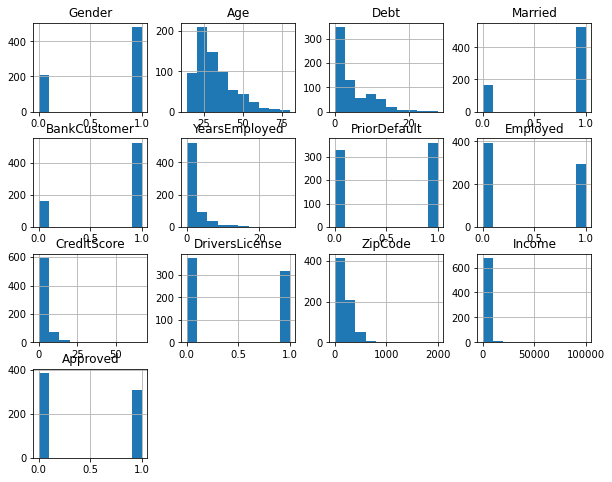

In [3]:
df.hist(figsize=(10,8));

### Analizo la correlacion de mis variables

<AxesSubplot:>

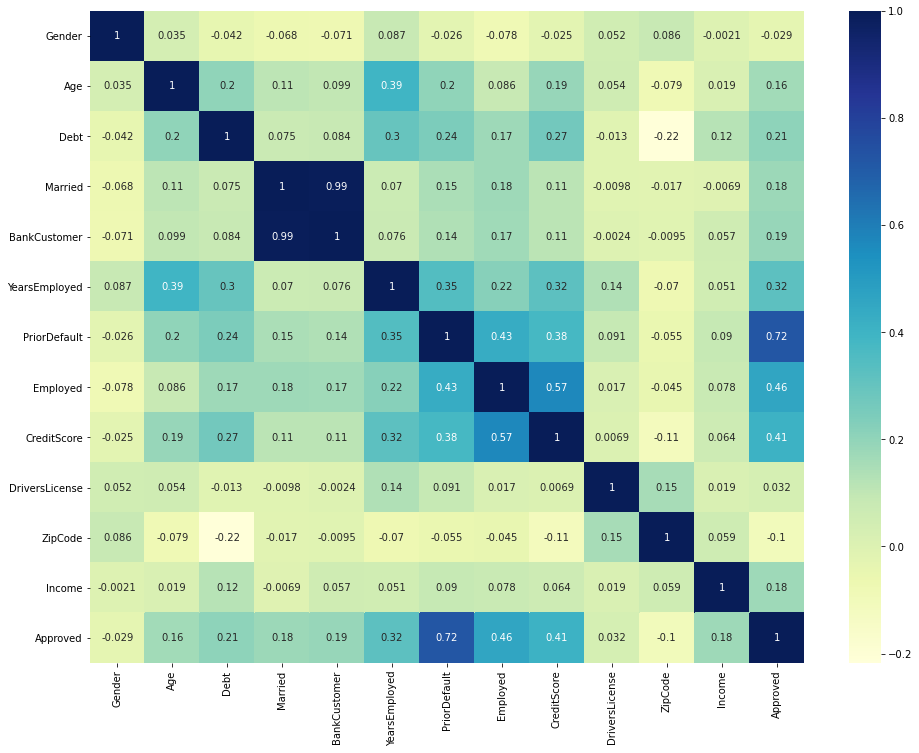

In [4]:
import seaborn as sns

plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [5]:
# Voy a excluir de mi modelo algunas columnas que tienen muy bajo impacto en mi prediccion
df = df.drop(['Gender', 'DriversLicense',  'ZipCode', "Industry", "Ethnicity", "Citizen"], axis=1)
df.head()

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,30.83,0.000,1,1,1.25,1,1,1,0,1
1,58.67,4.460,1,1,3.04,1,1,6,560,1
2,24.50,0.500,1,1,1.50,1,0,0,824,1
3,27.83,1.540,1,1,3.75,1,1,5,3,1
4,20.17,5.625,1,1,1.71,1,0,0,0,1


In [6]:
# Defino mis variables
response = df[['Approved']]
predictors = df.drop('Approved', axis=1)

<AxesSubplot:>

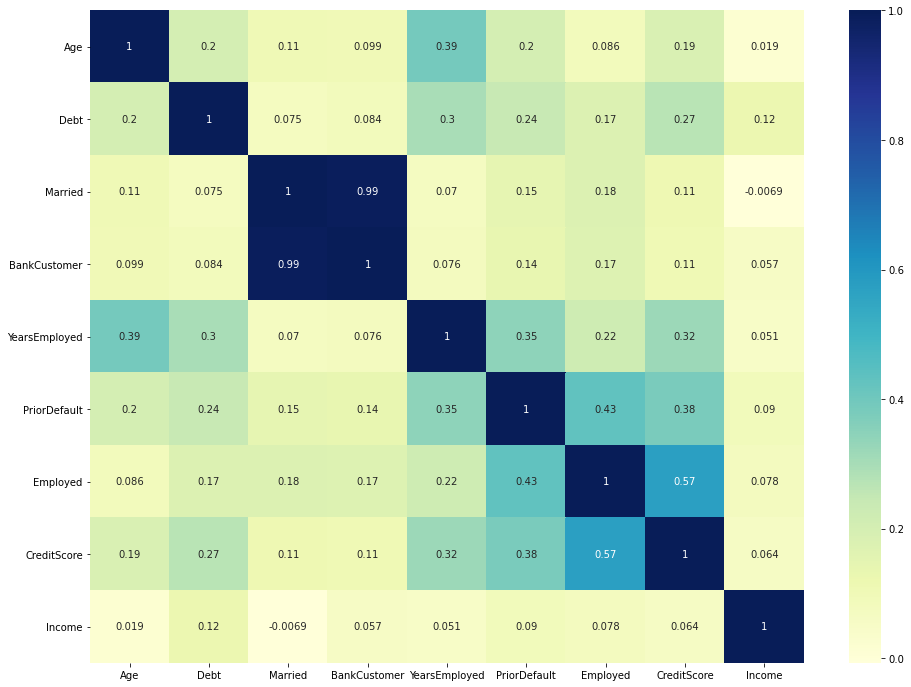

In [7]:
import seaborn as sns

plt.figure(figsize=(16,12))
sns.heatmap(predictors.corr(), annot=True, cmap="YlGnBu")

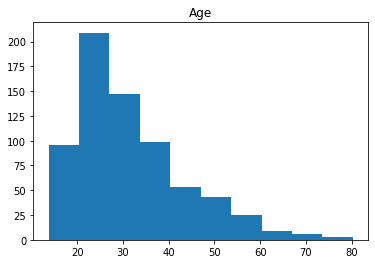

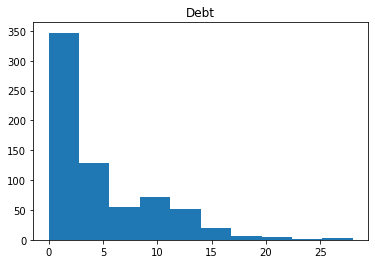

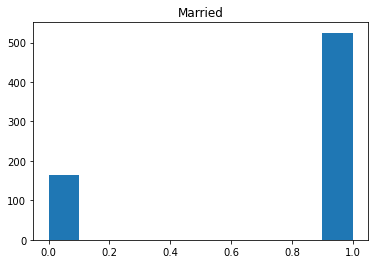

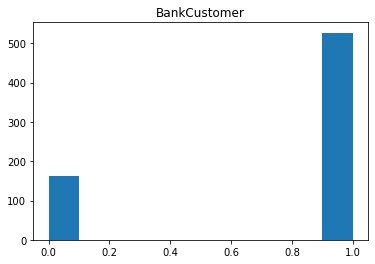

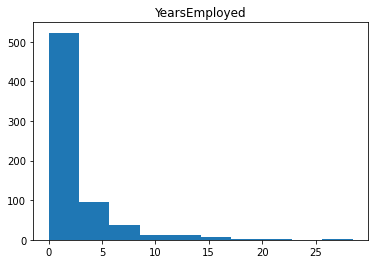

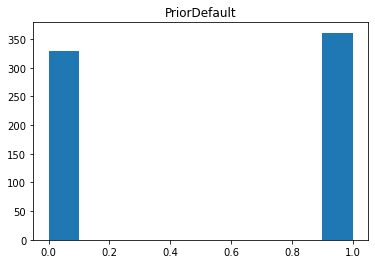

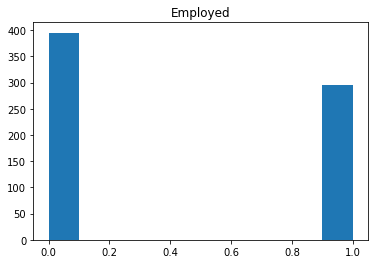

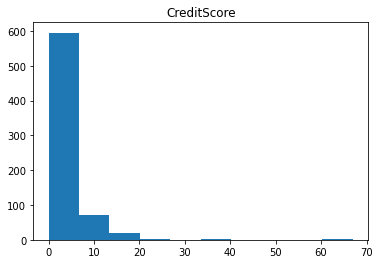

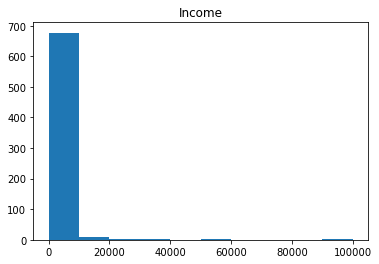

In [8]:
# Cantidad de registros por variable independiente
for predictor in list(predictors):
    plt.hist(predictors[predictor])
    plt.title(predictor)
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split

split = train_test_split(predictors, response, test_size=0.3, random_state=99)

predictors_train = split[0]
predictors_test = split[1]
response_train = split[2]
response_test = split[3]

print(predictors.shape)
print(response.shape)
print()
print(predictors_train.shape)
print(predictors_test.shape)
print(response_train.shape)
print(response_test.shape)

(690, 9)
(690, 1)

(483, 9)
(207, 9)
(483, 1)
(207, 1)


In [10]:
# Una vez que ya separé mis datos, debo decidir que modelo utilizar
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=2)
classifier.fit(predictors_train, response_train)

DecisionTreeClassifier(max_depth=2)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

response_predictions = classifier.predict(predictors_test)
print("  TN  FP")
print(confusion_matrix(response_test, response_predictions))
print("  FN  TP")
print()
print(classification_report(response_test, response_predictions,target_names=["No Approved","Approved"]))

  TN  FP
[[99 20]
 [ 8 80]]
  FN  TP

              precision    recall  f1-score   support

 No Approved       0.93      0.83      0.88       119
    Approved       0.80      0.91      0.85        88

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.87      0.86      0.87       207



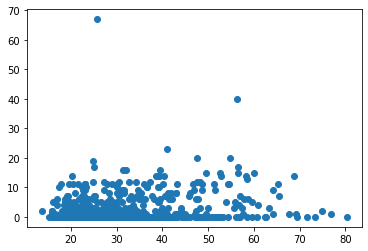

In [12]:
# El credit score suele darse en la franja de los 25 y 40 años y baja considerablemente despues de los 55
plt.scatter(df["Age"], df["CreditScore"])
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
import numpy as np

regressor = LogisticRegression(solver='liblinear')
regressor.fit(predictors_train, np.ravel(response_train))

LogisticRegression(solver='liblinear')

<AxesSubplot:xlabel='Debt', ylabel='Approved'>

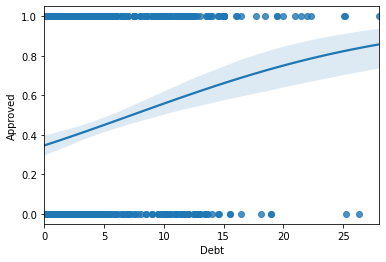

In [20]:
sns.regplot(x= 'Debt', y= 'Approved', data= df, logistic=True)

<AxesSubplot:xlabel='YearsEmployed', ylabel='Approved'>

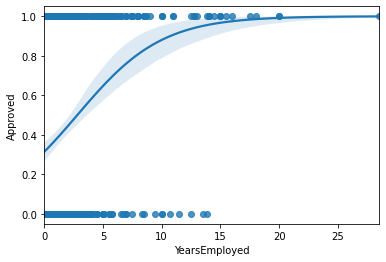

In [23]:
sns.regplot(x= 'YearsEmployed', y= 'Approved', data= df, logistic=True)

<AxesSubplot:xlabel='Age', ylabel='Approved'>

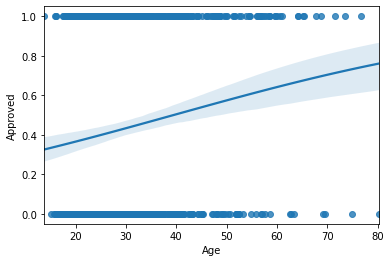

In [24]:
sns.regplot(x= 'Age', y= 'Approved', data= df, logistic=True)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

response_predictions = regressor.predict(predictors_test)
print("  TN  FP")
print(confusion_matrix(response_test, response_predictions))
print("  FN  TP")
print()
print(classification_report(response_test, response_predictions,target_names=["No Approval","Approval"]))

  TN  FP
[[101  18]
 [  8  80]]
  FN  TP

              precision    recall  f1-score   support

 No Approval       0.93      0.85      0.89       119
    Approval       0.82      0.91      0.86        88

    accuracy                           0.87       207
   macro avg       0.87      0.88      0.87       207
weighted avg       0.88      0.87      0.88       207

